In [33]:
import datetime as dt
import iexfinance 
import os
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as web
api_key = "pk_302cec344b0c4d41b94e75bb951b7904"

In [49]:


style.use('ggplot')

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()
df = web.DataReader('TSLA', data_source = "iex", start = start, end = end, api_key = "pk_302cec344b0c4d41b94e75bb951b7904")

print(df.head())

               open     high      low    close      volume
date                                                      
2015-01-02  14.8580  14.8833  14.2173  14.6207  71466645.0
2015-01-05  14.3033  14.4333  13.8108  14.0060  80527155.0
2015-01-06  14.0040  14.2800  13.6140  14.0853  93929040.0
2015-01-07  14.2233  14.3187  13.9853  14.0633  44525850.0
2015-01-08  14.1873  14.2533  14.0007  14.0410  51637635.0


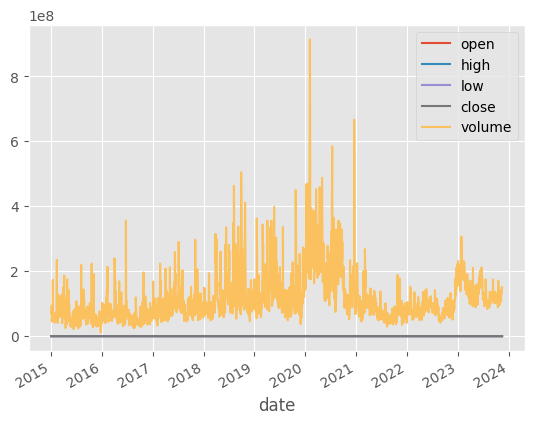

In [50]:
df.to_csv('TSLA.csv')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)


df.plot()
plt.show()

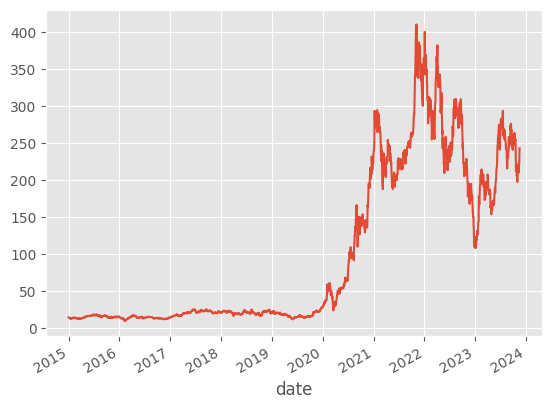

In [53]:
df['close'].plot()
plt.show()

In [58]:
df[['high','low']]

,high,low
date,,
2015-01-02,14.8833,14.2173
2015-01-05,14.4333,13.8108
2015-01-06,14.2800,13.6140
2015-01-07,14.3187,13.9853
2015-01-08,14.2533,14.0007
...,...,...
2023-11-09,220.8000,206.6800
2023-11-10,215.3800,205.6900
2023-11-13,225.4000,211.6101


               open     high      low    close      volume      100ma
date                                                                 
2015-01-02  14.8580  14.8833  14.2173  14.6207  71466645.0  14.620700
2015-01-05  14.3033  14.4333  13.8108  14.0060  80527155.0  14.313350
2015-01-06  14.0040  14.2800  13.6140  14.0853  93929040.0  14.237333
2015-01-07  14.2233  14.3187  13.9853  14.0633  44525850.0  14.193825
2015-01-08  14.1873  14.2533  14.0007  14.0410  51637635.0  14.163260


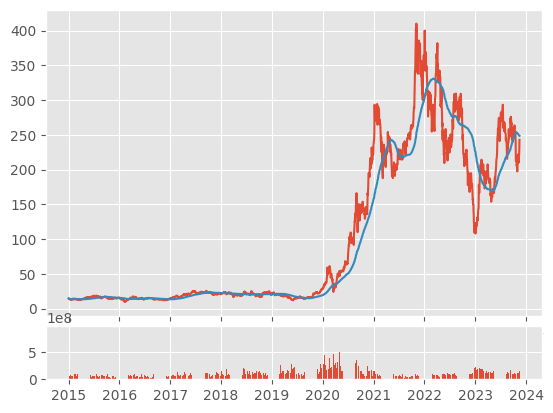

In [59]:
df['100ma'] = df['close'].rolling(window=100, min_periods=0).mean()
print(df.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['volume'])

plt.show()

In [70]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

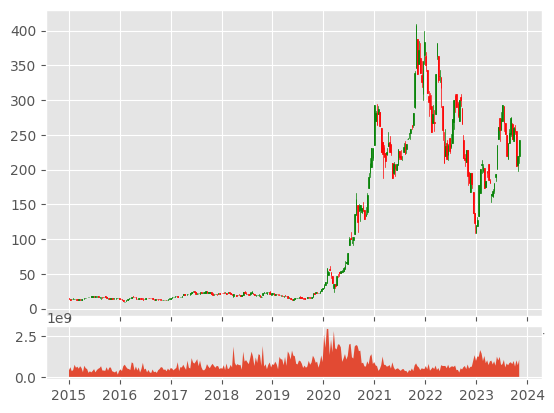

In [71]:
df_ohlc = df['close'].resample('10D').ohlc()
df_volume = df['volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['date'] = df_ohlc['date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

In [72]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

save_sp500_tickers()

['MMM\n',
 'AOS\n',
 'ABT\n',
 'ABBV\n',
 'ACN\n',
 'ADM\n',
 'ADBE\n',
 'ADP\n',
 'AES\n',
 'AFL\n',
 'A\n',
 'ABNB\n',
 'APD\n',
 'AKAM\n',
 'ALK\n',
 'ALB\n',
 'ARE\n',
 'ALGN\n',
 'ALLE\n',
 'LNT\n',
 'ALL\n',
 'GOOGL\n',
 'GOOG\n',
 'MO\n',
 'AMZN\n',
 'AMCR\n',
 'AMD\n',
 'AEE\n',
 'AAL\n',
 'AEP\n',
 'AXP\n',
 'AIG\n',
 'AMT\n',
 'AWK\n',
 'AMP\n',
 'AME\n',
 'AMGN\n',
 'APH\n',
 'ADI\n',
 'ANSS\n',
 'AON\n',
 'APA\n',
 'AAPL\n',
 'AMAT\n',
 'APTV\n',
 'ACGL\n',
 'ANET\n',
 'AJG\n',
 'AIZ\n',
 'T\n',
 'ATO\n',
 'ADSK\n',
 'AZO\n',
 'AVB\n',
 'AVY\n',
 'AXON\n',
 'BKR\n',
 'BALL\n',
 'BAC\n',
 'BBWI\n',
 'BAX\n',
 'BDX\n',
 'WRB\n',
 'BRK.B\n',
 'BBY\n',
 'BIO\n',
 'TECH\n',
 'BIIB\n',
 'BLK\n',
 'BX\n',
 'BK\n',
 'BA\n',
 'BKNG\n',
 'BWA\n',
 'BXP\n',
 'BSX\n',
 'BMY\n',
 'AVGO\n',
 'BR\n',
 'BRO\n',
 'BF.B\n',
 'BG\n',
 'CHRW\n',
 'CDNS\n',
 'CZR\n',
 'CPT\n',
 'CPB\n',
 'COF\n',
 'CAH\n',
 'KMX\n',
 'CCL\n',
 'CARR\n',
 'CTLT\n',
 'CAT\n',
 'CBOE\n',
 'CBRE\n',
 'CDW\n',
 'CE\

In [78]:
# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader('TSLA', data_source = "iex", start = start, end = end, api_key = "pk_302cec344b0c4d41b94e75bb951b7904")
            df.reset_index(inplace=True)
            df.set_index("date", inplace=True)
        else:
            print('Already have {}'.format(ticker))


get_data_from_yahoo()

In [81]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv(''.format(ticker))
        df.set_index('date', inplace=True)

        df.rename(columns={'close': ticker}, inplace=True)
        df.drop(['open', 'high', 'low', 'close', 'volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()


visualize_data()

In [ ]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df

In [ ]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [ ]:
from collections import Counter

In [ ]:
def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)] ))

In [ ]:
vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:',Counter(str_vals))

# Clean up our data:

    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

In [ ]:
 df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

## Again, being careful about infinite numbers, and then filling any other missing data, and, now, finally, we are ready to create our features and labels:

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X,y,df

In [ ]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:', Counter(predictions))
    print()
    print()
    return confidence


# examples of running:
do_ml('XOM')
do_ml('AAPL')
do_ml('ABT')

# We can also run this against all tickers:

from statistics import mean

with open("sp500tickers.pickle","rb") as f:
    tickers = pickle.load(f)

accuracies = []
for count,ticker in enumerate(tickers):

    if count%10==0:
        print(count)

    accuracy = do_ml(ticker)
    accuracies.append(accuracy)
    print("{} accuracy: {}. Average accuracy:{}".format(ticker,accuracy,mean(accuracies)))

In [ ]:
"""
This is a template algorithm on Quantopian for you to adapt and fill in.
"""
from quantopian.algorithm import attach_pipeline, pipeline_output
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.factors import AverageDollarVolume
 
def initialize(context):
    """
    Called once at the start of the algorithm.
    """   
    # Rebalance every day, 1 hour after market open.
    schedule_function(my_rebalance, date_rules.every_day(), time_rules.market_open(hours=1))
     
    # Record tracking variables at the end of each day.
    schedule_function(my_record_vars, date_rules.every_day(), time_rules.market_close())
     
    # Create our dynamic stock selector.
    attach_pipeline(make_pipeline(), 'my_pipeline')
         
def make_pipeline():
    """
    A function to create our dynamic stock selector (pipeline). Documentation on
    pipeline can be found here: https://www.quantopian.com/help#pipeline-title
    """
    
     
    # Create a dollar volume factor.
    dollar_volume = AverageDollarVolume(window_length=1)
 
    # Pick the top 1% of stocks ranked by dollar volume.
    high_dollar_volume = dollar_volume.percentile_between(99, 100)
     
    pipe = Pipeline(
        screen = high_dollar_volume,
        columns = {
            'dollar_volume': dollar_volume
        }
    )
    return pipe
 
def before_trading_start(context, data):
    """
    Called every day before market open.
    """
    context.output = pipeline_output('my_pipeline')
  
    # These are the securities that we are interested in trading each day.
    context.security_list = context.output.index
     
def my_assign_weights(context, data):
    """
    Assign weights to securities that we want to order.
    """
    pass
 
def my_rebalance(context,data):
    """
    Execute orders according to our schedule_function() timing. 
    """
    pass
 
def my_record_vars(context, data):
    """
    Plot variables at the end of each day.
    """
    pass
 
def handle_data(context,data):
    """
    Called every minute.
    """
    pass

In [ ]:
def initialize(context):
    context.aapl = sid(24)
    

In [ ]:
def handle_data(context,data):
    # prices for aapl for the last 50 days, in 1 day intervals
    hist = data.history(context.aapl,'price', 50, '1d')

In [ ]:
# mean of the entire 200 day history
    sma_50 = hist.mean()
    # mean of just the last 50 days
    sma_20 = hist[-20:].mean()

In [ ]:
def initialize(context):
    context.aapl = sid(24)
    
def handle_data(context,data):
    
    # prices for aapl for the last 50 days, in 1 day intervals
    hist = data.history(context.aapl,'price', 50, '1d')
    
    # mean of the entire 50 day history
    sma_50 = hist.mean()
    
    # mean of just the last 50 days
    sma_20 = hist[-20:].mean()

In [ ]:
if sma_20 > sma_50:
        order_target_percent(context.aapl, 1.0)
    elif sma_20 < sma_50:
        order_target_percent(context.aapl, -1.0)

In [ ]:
def initialize(context):
    context.aapl = sid(24)
    
def handle_data(context,data):
    hist = data.history(context.aapl,'price', 50, '1d')
    
    sma_50 = hist.mean()
    sma_20 = hist[-20:].mean()
    
    if sma_20 > sma_50:
        order_target_percent(context.aapl, 1.0)
    elif sma_20 < sma_50:
        order_target_percent(context.aapl, -1.0)
        
    record(leverage = context.account.leverage)

In [ ]:
open_orders = get_open_orders()
    
    if sma_20 > sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, 1.0)
    elif sma_20 < sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, -1.0)

In [ ]:
def initialize(context):
    context.aapl = sid(24)
    schedule_function(ma_crossover_handling, date_rules.every_day(), time_rules.market_open(hours=1))

#### Here, we're saying that we want to have a scheduled function that runs every_day, 1 hour after market_open. As usual, there are many options here. You can do "x" hours before market close (still using positive values). For example if you wanted to do this 1 hour before market_close, it would be time_rules.market_close(hours=1). You can also schedule in minutes, like: time_rules.market_close(hours=0, minutes=1), which means to run this function 1 minute before the markets close.

##### Now, what we want to do is take the following code from the handle_data function:

In [ ]:
hist = data.history(context.aapl,'price', 50, '1d')
    
    sma_50 = hist.mean()
    sma_20 = hist[-20:].mean()
    
    open_orders = get_open_orders()
    
    if sma_20 > sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, 1.0)
    elif sma_20 < sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, -1.0)

In [ ]:
def ma_crossover_handling(context,data):
    hist = data.history(context.aapl,'price', 50, '1d')
    
    sma_50 = hist.mean()
    sma_20 = hist[-20:].mean()
    
    open_orders = get_open_orders()
    
    if sma_20 > sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, 1.0)
    elif sma_20 < sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, -1.0)

###### Note that we're passing both context and data here. Now, run the full back-test, and you should notice that this runs *much* faster than before. This is because we're not actually re-calculating those moving averages every minute, we're just doing it daily now. This is saving us a ton of processing.

Notice, however, that some of our transaction bars are showing that we're buying or selling almost $2 million worth of shares, when our capital is supposed to be $1 million, and we're not doing well enough to have doubled it.


The shorting is causing this. When we short a company on Quantopian, we've got negative shares. For example, let's say we short 100 shares of Apple. This means we have a -100 share position in Apple. Then consider we want to change our position to be holding 100 shares of Apple. We actually need to buy 100 shares to just be at 0 shares, then another hundred shares to be at +100. The same is true to go from +100 to -100. This is why we have those seemingly double-sized trades, without leverage. So we're about -7% by buying (going long), and shorting Apple, depending on the moving average crossovers. What might happen if we just buy and sell instead of buying and shorting?

In [ ]:
def initialize(context):
    context.aapl = sid(24)
    schedule_function(ma_crossover_handling, date_rules.every_day(), time_rules.market_open(hours=1))
    
def handle_data(context,data):
    record(leverage=context.account.leverage)
        
def ma_crossover_handling(context,data):
    hist = data.history(context.aapl,'price', 50, '1d')
    
    sma_50 = hist.mean()
    sma_20 = hist[-20:].mean()
    
    open_orders = get_open_orders()
    
    if sma_20 > sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, 1.0)
    elif sma_20 < sma_50:
        if context.aapl not in open_orders:
            order_target_percent(context.aapl, 0.0)

In [ ]:
from quantopian.pipeline.filters.morningstar import Q1500US
type(sentiment)
<class 'blaze.expr.expressions.Field'>
"""
Note that the datasets you import in the Research section are Blaze expressions. More info: https://blaze.readthedocs.io/en/latest/

We can see the attributes:

dir(sentiment)
['apply',
 u'asof_date',
 'cast',
 'count',
 'count_values',
 'distinct',
 'dshape',
 'fields',
 'head',
 'isidentical',
 'map',
 'ndim',
 'nelements',
 'nrows',
 'nunique',
 'peek',
 'relabel',
 'sample',
 'schema',
 u'sentiment_signal',
 'shape',
 'shift',
 u'sid',
 'sort',
 u'symbol',
 'tail',
 u'timestamp']
 """
## Blaze abstracts out computation and storage, aiming to give you faster speeds. From what I've seen blaze is about 4-6x faster than your typical pandas dataframe. Considering the sizes of the dataframes we're using here and the compute times, this is a great improvement, we'll take it. As far as we're concerned, however, we're mostly going to just treat this like a pandas dataframe. For example:

BAC = symbols('BAC').sid
bac_sentiment = sentiment[ (sentiment.sid==BAC) ]
bac_sentiment.head()

In [ ]:
import blaze

bac_sentiment = blaze.compute(bac_sentiment)
type(bac_sentiment)
<class 'pandas.core.frame.DataFrame'>
bac_sentiment.set_index('asof_date', inplace=True)
bac_sentiment['sentiment_signal'].plot()
<matplotlib.axes._subplots.AxesSubplot at 0x7f0795d13050>
bac_sentiment = bac_sentiment[ (bac_sentiment.index > '2016-06-01') ]
bac_sentiment['sentiment_signal'].plot()

from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline.data.sentdex import sentiment

def make_pipeline():
    
    #Factor returns 
    sentiment_factor = sentiment.sentiment_signal.latest
    
    # Our universe is made up of stocks that have a non-null sentiment signal that was updated in
    # the last day, are not within 2 days of an earnings announcement, are not announced acquisition
    # targets, and are in the Q1500US.
    universe = (Q1500US() 
                & sentiment_factor.notnull())
    
    # A classifier to separate the stocks into quantiles based on sentiment rank.

    
    # Go short the stocks in the 0th quantile, and long the stocks in the 2nd quantile.
    pipe = Pipeline(
        columns={
            'sentiment': sentiment_factor,
            'longs': (sentiment_factor >=4),
            'shorts': (sentiment_factor<=2),
        },
        screen=universe
    )
    
    return pipe

In [ ]:
result = run_pipeline(make_pipeline(), start_date='2015-01-01', end_date='2016-01-01')

In [ ]:
result.head()

## Alphalens Analysis

In [ ]:
assets = result.index.levels[1].unique()
pricing = get_pricing(assets, start_date='2014-12-01', end_date='2016-02-01', fields='open_price')

In [82]:
import alphalens

alphalens.tears.create_factor_tear_sheet(factor=result['sentiment'],
                                         prices=pricing,
                                         quantiles=2,
                                         periods=(1,5,10))

AttributeError: module 'alphalens.tears' has no attribute 'create_factor_tear_sheet'

In [83]:
from quantopian.pipeline import Pipeline
from quantopian.algorithm import attach_pipeline, pipeline_output
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline.data.sentdex import sentiment

def initialize(context):
    """
    Called once at the start of the algorithm.
    """   
    # Rebalance every day, 1 hour after market open.
    schedule_function(my_rebalance, date_rules.every_day(), time_rules.market_open(hours=1))
     
    # Record tracking variables at the end of each day.
    schedule_function(my_record_vars, date_rules.every_day(), time_rules.market_close())
     
    # Create our dynamic stock selector.
    attach_pipeline(make_pipeline(), 'my_pipeline')
    
    set_commission(commission.PerTrade(cost=0.001))



def make_pipeline():
    
    # 5-day sentiment moving average factor.
    sentiment_factor = sentiment.sentiment_signal.latest
    
    # Our universe is made up of stocks that have a non-null sentiment signal and are in the Q1500US.
    universe = (Q1500US() 
                & sentiment_factor.notnull())
    
    # A classifier to separate the stocks into quantiles based on sentiment rank.
    sentiment_quantiles = sentiment_factor.rank(mask=universe, method='average').quantiles(2)
    
    # Go short the stocks in the 0th quantile, and long the stocks in the 2nd quantile.
    pipe = Pipeline(
        columns={
            'sentiment': sentiment_quantiles,
            'longs': (sentiment_factor >=4),
            'shorts': (sentiment_factor<=2),
        },
        screen=universe
    )
    
    return pipe



def before_trading_start(context, data):
    try:
        """
        Called every day before market open.
        """
        context.output = pipeline_output('my_pipeline')

        # These are the securities that we are interested in trading each day.
        context.security_list = context.output.index.tolist()
    except Exception as e:
        print(str(e))
    
 
def my_rebalance(context,data):
    """
    Place orders according to our schedule_function() timing.
    """
    
    # Compute our portfolio weights.
    long_secs = context.output[context.output['longs']].index
    long_weight = 0.5 / len(long_secs)
    
    short_secs = context.output[context.output['shorts']].index
    short_weight = -0.5 / len(short_secs)

    # Open our long positions.
    for security in long_secs:
        if data.can_trade(security):
            order_target_percent(security, long_weight)
    
    # Open our short positions.
    for security in short_secs:
        if data.can_trade(security):
            order_target_percent(security, short_weight)

    # Close positions that are no longer in our pipeline.
    for security in context.portfolio.positions:
        if data.can_trade(security) and security not in long_secs and security not in short_secs:
            order_target_percent(security, 0)
    
 
def my_record_vars(context, data):
    """
    Plot variables at the end of each day.
    """
    long_count = 0
    short_count = 0

    for position in context.portfolio.positions.itervalues():
        if position.amount > 0:
            long_count += 1
        if position.amount < 0:
            short_count += 1
            
    # Plot the counts
    record(num_long=long_count, num_short=short_count, leverage=context.account.leverage)

ModuleNotFoundError: No module named 'quantopian'

#### To begin, I will reference the introduction to Alphalens post on Quantopian. There, we have a simplified workflow that is:
##### 1 
Universe Selection: define the universe of tradeable components; the universe should be broad but have some degree of self similarity to enable extraction of relative value. It should also eliminate hard to trade or prohibited instrumet



s#### 2 .
Single Alpha Factor Modeling: define and evaluate individual expressions which rank the cross section of equities in your univer



s##### 3 e.
Alpha Combination: combine many single alphas into a final alpha which has stronger prediction power than the best single alpha. This is often due to the noise in each alpha being canceled out by noise in other alphas, allowing signal to come thro




u##### 4 gh.
Risk Model: define and calculate the set of risk factors you want to use to constrain your portf



o##### 5 lio.
Portfolio Construction: implement a process which takes your final combined alpha and your risk model and produces a target portfolio that minimizes risk under your 



m##### 6 odel.
Execution: implement a trading process to transition the current portfolio (if any) to the target portfolio.

In [84]:
import pandas as pd

import quantopian.algorithm as algo
import quantopian.experimental.optimize as opt

from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import builtin, morningstar as mstar
from quantopian.pipeline.factors import AverageDollarVolume
from quantopian.pipeline.factors.morningstar import MarketCap
from quantopian.pipeline.classifiers.morningstar import Sector

from quantopian.pipeline.data.sentdex import sentiment
from quantopian.pipeline.data.morningstar import operation_ratios
from quantopian.pipeline.filters.morningstar import Q1500US

# Algorithm Parameters
# --------------------
# Universe Selection Parameters
UNIVERSE_SIZE = 500
MIN_MARKET_CAP_PERCENTILE = 50
LIQUIDITY_LOOKBACK_LENGTH = 100

# Constraint Parameters
MAX_GROSS_LEVERAGE = 1.0
MAX_SHORT_POSITION_SIZE = 0.002  # 1.5%
MAX_LONG_POSITION_SIZE = 0.002   # 1.5%

# Scheduling Parameters
MINUTES_AFTER_OPEN_TO_TRADE = 10
BASE_UNIVERSE_RECALCULATE_FREQUENCY = 'month_start'  # {week,quarter,year}_start are also valid


def initialize(context):
    testing_factor1 = operation_ratios.operation_margin.latest
    testing_factor2 = operation_ratios.revenue_growth.latest
    testing_factor3 = sentiment.sentiment_signal.latest
    
    universe = (Q1500US() &
               testing_factor1.notnull() &
               testing_factor2.notnull() &
               testing_factor3.notnull())
    
    testing_factor1 = testing_factor1.rank(mask=universe, method='average')
    testing_factor2 = testing_factor2.rank(mask=universe, method='average')
    testing_factor3 = testing_factor3.rank(mask=universe, method='average')
    
    combined_alpha = testing_factor1 + testing_factor2 + testing_factor3

    # Schedule Tasks
    # --------------
    # Create and register a pipeline computing our combined alpha and a sector
    # code for every stock in our universe. We'll use these values in our 
    # optimization below.
    pipe = Pipeline(
        columns={
            'alpha': combined_alpha,
            'sector': Sector(),
        },
        # combined_alpha will be NaN for all stocks not in our universe,
        # but we also want to make sure that we have a sector code for everything
        # we trade.
        screen=combined_alpha.notnull() & Sector().notnull(),
    )
    algo.attach_pipeline(pipe, 'pipe')

    # Schedule a function, 'do_portfolio_construction', to run once a week
    # ten minutes after market open.
    algo.schedule_function(
        do_portfolio_construction,
        date_rule=algo.date_rules.week_start(),
        time_rule=algo.time_rules.market_open(minutes=MINUTES_AFTER_OPEN_TO_TRADE),
        half_days=False,
    )


def before_trading_start(context, data):
    # Call pipeline_output in before_trading_start so that pipeline
    # computations happen in the 5 minute timeout of BTS instead of the 1
    # minute timeout of handle_data/scheduled functions.
    context.pipeline_data = algo.pipeline_output('pipe')


# Portfolio Construction
# ----------------------
def do_portfolio_construction(context, data):
    pipeline_data = context.pipeline_data
    todays_universe = pipeline_data.index

    # Objective
    # ---------
    # For our objective, we simply use our naive ranks as an alpha coefficient
    # and try to maximize that alpha.
    # 
    # This is a **very** naive model. Since our alphas are so widely spread out,
    # we should expect to always allocate the maximum amount of long/short
    # capital to assets with high/low ranks.
    #
    # A more sophisticated model would apply some re-scaling here to try to generate
    # more meaningful predictions of future returns.
    objective = opt.MaximizeAlpha(pipeline_data.alpha)

    # Constraints
    # -----------
    # Constrain our gross leverage to 1.0 or less. This means that the absolute
    # value of our long and short positions should not exceed the value of our
    # portfolio.
    constrain_gross_leverage = opt.MaxGrossLeverage(MAX_GROSS_LEVERAGE)
    
    # Constrain individual position size to no more than a fixed percentage 
    # of our portfolio. Because our alphas are so widely distributed, we 
    # should expect to end up hitting this max for every stock in our universe.
    constrain_pos_size = opt.PositionConcentration.with_equal_bounds(
        -MAX_SHORT_POSITION_SIZE,
        MAX_LONG_POSITION_SIZE,
    )

    # Constrain ourselves to allocate the same amount of capital to 
    # long and short positions.
    market_neutral = opt.DollarNeutral()
    
    # Constrain ourselve to have a net leverage of 0.0 in each sector.
    sector_neutral = opt.NetPartitionExposure.with_equal_bounds(
        labels=pipeline_data.sector,
        min=-0.0001,
        max=0.0001,
    )

    # Run the optimization. This will calculate new portfolio weights and
    # manage moving our portfolio toward the target.
    algo.order_optimal_portfolio(
        objective=objective,
        constraints=[
            constrain_gross_leverage,
            constrain_pos_size,
            market_neutral,
            sector_neutral,
        ],
        universe=todays_universe,
    )

ModuleNotFoundError: No module named 'quantopian'